In [3]:
import os
import pandas as pd
import numpy as np
import requests
from pprint import pprint
import gmaps
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.cm as cm


In [7]:
quake_df = pd.read_csv("../data/all_earthquake_data2.zip")
quake_df['year'] = pd.DatetimeIndex(quake_df['time']).year
quake_df

,time,latitude,longitude,mag,place,year
0,1969-12-13T18:59:11.430Z,19.313000,-155.104000,2.78,"17 km S of Fern Forest, Hawaii",1969
1,1969-12-13T17:55:57.400Z,46.709000,-119.234333,1.60,"13 km SSW of Othello, Washington",1969
2,1969-12-13T13:03:04.570Z,19.466667,-155.487667,1.94,"26 km W of Volcano, Hawaii",1969
3,1969-12-13T12:53:50.580Z,19.443167,-155.248833,NaN,"1 km W of Volcano, Hawaii",1969
4,1969-12-13T10:43:38.000Z,19.304167,-155.210500,2.51,"15 km S of Volcano, Hawaii",1969
...,...,...,...,...,...,...
4053076,2021-07-25T00:14:10.316Z,62.637400,-150.151200,1.30,"21 km N of Chase, Alaska",2021
4053077,2021-07-25T00:05:08.190Z,19.228500,-155.453659,1.84,"3 km NE of P?hala, Hawaii",2021
4053078,2021-07-25T00:03:53.992Z,11.217900,-86.871700,4.50,"74 km SSW of Masachapa, Nicaragua",2021
4053079,2021-07-25T00:02:53.559Z,60.157700,-141.588500,1.10,"124 km WNW of Yakutat, Alaska",2021


In [8]:
quake_df['year'] = pd.DatetimeIndex(quake_df['time']).year
locations = quake_df[["latitude", "longitude"]]
magnitude  = quake_df[['mag']].astype(float)
quake_df['decade'] = quake_df['year'].apply(lambda x: str(x) [:3] + '0s')
quake_df

,time,latitude,longitude,mag,place,year,decade
0,1969-12-13T18:59:11.430Z,19.313000,-155.104000,2.78,"17 km S of Fern Forest, Hawaii",1969,1960s
1,1969-12-13T17:55:57.400Z,46.709000,-119.234333,1.60,"13 km SSW of Othello, Washington",1969,1960s
2,1969-12-13T13:03:04.570Z,19.466667,-155.487667,1.94,"26 km W of Volcano, Hawaii",1969,1960s
3,1969-12-13T12:53:50.580Z,19.443167,-155.248833,NaN,"1 km W of Volcano, Hawaii",1969,1960s
4,1969-12-13T10:43:38.000Z,19.304167,-155.210500,2.51,"15 km S of Volcano, Hawaii",1969,1960s
...,...,...,...,...,...,...,...
4053076,2021-07-25T00:14:10.316Z,62.637400,-150.151200,1.30,"21 km N of Chase, Alaska",2021,2020s
4053077,2021-07-25T00:05:08.190Z,19.228500,-155.453659,1.84,"3 km NE of P?hala, Hawaii",2021,2020s
4053078,2021-07-25T00:03:53.992Z,11.217900,-86.871700,4.50,"74 km SSW of Masachapa, Nicaragua",2021,2020s
4053079,2021-07-25T00:02:53.559Z,60.157700,-141.588500,1.10,"124 km WNW of Yakutat, Alaska",2021,2020s


In [31]:
seventies = quake_df.loc[(quake_df['decade'] == '1970s') & (quake_df['mag'] >= 3)]
num_of_quakes_70 = seventies['decade'].value_counts()
eighties = quake_df.loc[(quake_df['decade'] == '1980s') & (quake_df['mag'] >= 3)]
num_of_quakes_80 = eighties['decade'].value_counts()
nineties = quake_df.loc[(quake_df['decade'] == '1990s') & (quake_df['mag'] >= 3)]
num_of_quakes_90 = nineties['decade'].value_counts()
y2k = quake_df.loc[(quake_df['decade'] == '2000s') & (quake_df['mag'] >= 3)]
num_of_quakes_00 = y2k['decade'].value_counts()
y2k1 = quake_df.loc[(quake_df['decade'] == '2010s') & (quake_df['mag'] >= 3)]
num_of_quakes_10 = y2k1['decade'].value_counts()
y2k2 = quake_df.loc[(quake_df['year'] == 2020) & (quake_df['mag'] >= 3)]
print(f'Total Number to Earthquakes in {num_of_quakes_70}')
print(f'Total Number to Earthquakes in {num_of_quakes_80}')
print(f'Total Number to Earthquakes in {num_of_quakes_90}')
print(f'Total Number to Earthquakes in {num_of_quakes_00}')
print(f'Total Number to Earthquakes in {num_of_quakes_10}')

Total Number to Earthquakes in 1970s    40968
Name: decade, dtype: int64
Total Number to Earthquakes in 1980s    75568
Name: decade, dtype: int64
Total Number to Earthquakes in 1990s    125440
Name: decade, dtype: int64
Total Number to Earthquakes in 2000s    199869
Name: decade, dtype: int64
Total Number to Earthquakes in 2010s    187015
Name: decade, dtype: int64


In [32]:
SeventiesLong = seventies["longitude"]
SeventiesMag = seventies["mag"]
EightiesLong = eighties["longitude"]
EightiesMag = eighties["mag"]
NinetiesLong = nineties["longitude"]
NinetiesMag = nineties["mag"]
y2kLong = y2k["longitude"]
y2kMag = y2k["mag"]
y2k1Long = y2k1["longitude"]
y2k1Mag = y2k1["mag"]

FileNotFoundError: [Errno 2] No such file or directory: 'pictures/Fig1.png'

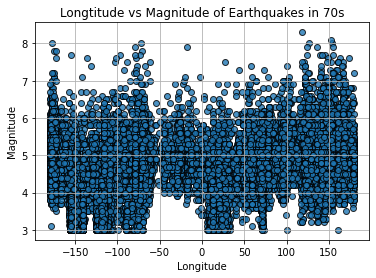

In [33]:
plt.scatter(SeventiesLong,SeventiesMag , 
           edgecolor = "black", linewidths = 1, marker = "o",
           alpha = 0.8, label ="Cities")

plt.title("Longtitude vs Magnitude of Earthquakes in 70s")
plt.ylabel("Magnitude")
plt.xlabel("Longitude")
plt.grid(True)

plt.savefig("pictures/Fig1.png")
plt.show()

In [ ]:
plt.scatter(EightiesLong,EightiesMag , 
           edgecolor = "black", linewidths = 1, marker = "o",
           alpha = 0.8, label ="Cities")

plt.title("Longtitude vs Magnitude of Earthquakes in 80s")
plt.ylabel("Magnitude")
plt.xlabel("Longitude")
plt.grid(True)

plt.savefig("pictures/Fig2.png")
plt.show()

In [ ]:
plt.scatter(NinetiesLong,NinetiesMag , 
           edgecolor = "black", linewidths = 1, marker = "o",
           alpha = 0.8, label ="Cities")

plt.title("Longtitude vs Magnitude of Earthquakes in 90s")
plt.ylabel("Magnitude")
plt.xlabel("Longitude")
plt.grid(True)

plt.savefig("pictures/Fig3.png")
plt.show()

In [ ]:
plt.scatter(y2kLong,y2kMag , 
           edgecolor = "black", linewidths = 1, marker = "o",
           alpha = 0.8, label ="Cities")

plt.title("Longtitude vs Magnitude of Earthquakes in 2000s")
plt.ylabel("Magnitude")
plt.xlabel("Longitude")
plt.grid(True)

plt.savefig("pictures/Fig4.png")
plt.show()

In [ ]:
plt.scatter(y2k1Long,y2k1Mag , 
           edgecolor = "black", linewidths = 1, marker = "o",
           alpha = 0.8, label ="Cities")

plt.title("Longtitude vs Magnitude of Earthquakes in 2010s")
plt.ylabel("Magnitude")
plt.xlabel("Longitude")
plt.grid(True)

plt.savefig("pictures/Fig1.png")
plt.show()